# Problem Set 1 - KNN
## CSCI 5622 - Spring 2020

For today's assignment, we will be implementing our own K-Nearest Neighbors (KNN) algorithm.

*But Professor Quigley, hasn't someone else already written KNN before?*

Yes, you are not the first to implement KNN, or basically any algorithm we'll work with in this class. But
1. I'll know that you know what's really going on
2. You'll know you can do it, because
    1. someday you might have to implement some machine learning algorithm from scratch - maybe for a new platform (do you need to run python on your SmartToaster just to get it to learn how users like their toast?), maybe because you want to tweak the algorithm (there's always a better approach...),
    2. maybe because you're working on something important, and you need to control exactly what's on there (should you really be running anaconda on your secret spy plane?).

That said - we're not going to implement *everything*. We'll start by importing a few helper functions

In [1019]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.neighbors
import sklearn.datasets

*Wait a minute - didn't we just import Scikit-learn (sklearn)? The package with baked-in machine learning tools?*

Yes - but it also has a ton of helper functions, including a dataset we'll be using later. But first, let's also create a dataset to play with and start working to build out our own classifier.

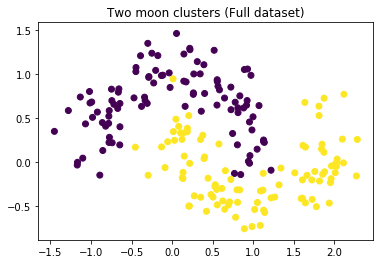

In [1020]:
X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.19, random_state=42)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]
plt.title("Two moon clusters (Full dataset)")
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

We have data!

Now, let's set up a KNNClassifier class. 

The KNNClassifier class will have similar design to the K-Nearest Neighbors classifier class from *scikit-learn*:
- Initialize the classifier with corresponding parameters (number of neighbors k)
- Fit the classifier using the training data
- Predict the class of new points `X_test`

We've written out a lot of the structure for you so it will be consistent and we can use / reuse it, and you can focus on the "important" stuff that actually relates to the machine learning itself.

In [1021]:
#Extra library imported
from collections import Counter
import operator

class KNNClassifier:

    def __init__(self, k = 5):
        """
        Initialize our custom KNN classifier
        PARAMETERS

        k - the number of nearest neighbors to consider for classification
        """
        self._k = k
        self._model = None
        self._y = None
        self.label_to_index = None
        self.index_to_label = None
        self.counts = 0

    def fit(self, features, labels):
        """
        
        :param features: 2-D np.array of shape (number training samples, features dimension)
        :param labels: 1-D np.array of shape (number training samples,)
        :return: self
        """
        
        self._model = sklearn.neighbors.BallTree(features)
        self._y = labels
        self.counts = self.get_counts()
        # Should be used to map the classes to {0,1,..C-1} where C is the number of classes
        self.label_to_index = dict(zip(sorted(self.counts.keys()), range(len(self.counts))))
        self.index_to_label = dict(zip(range(len(self.counts)), sorted(self.counts.keys())))
        return self

    def get_counts(self):
        """
        Creates a dictionary storing the count of elements of each class
        :return: dict where the keys are the classes and values are the counts
        """

        counts = dict()
        #BEGIN Workspace 1.1
        #TODO: Modify and/or add to counts so that it returns a count of each answer class found in y
        #END Workspace 1.1
        counts=Counter(self._y)
        self.counts=counts
        return self.counts

    def majority_vote(self, indices):
        """
        Given indices, report the majority label of those points.
        FOR A TIE, report the most common label in the data set.
        :param indices: indices of training neighbors of shape (M, k) where k the classifier parameter
        :return: The majority label for each set of indices, shape (M,)
        """
        labels = [] # REPLACE
        #BEGIN Workspace 1.2
        # TODO: Determine majority, assign it to label
        #END Workspace 1.2
        mostCommonLabel=max(self.counts.items(), key=operator.itemgetter(1))[0]
        myList=[]
        for i in indices:
            myList.append(self._y[i])
        for i in myList:
            tempCount=Counter(i)
            tempMax=max(tempCount.values())
            tempList=[]
            for j in tempCount:
                if tempCount[j]==tempMax:
                    tempList.append(j)
            if len(tempList)>1:
                labels.append(mostCommonLabel)
            else:
                labels.append(tempList[0])

        return labels

    def predict(self, points):
        """
        Given new data points, classify then according to the training data provided in fit and number of neighbors k
        :param point: feature vectors (num_points, num_features)
        :return: 1-D np.array of predicted classes of shape (num_points,)
        """

        answer = []
        #BEGIN Workspace 1.3
        #TODO: perform classification of points here
        #HINT: use the majority function created above
        #HINT: use the euclidean distance discussed in lecture to find nearest neighbors

        #END Workspace 1.3
        

        for i in points:
            distance,index=self._model.query(i.reshape(1, -1), k = self._k)
            answer.append(self.majority_vote(index))
        answer=np.array(answer)

        return answer

    def confusion_matrix(self, features_test, labels_test):
        """
        Generate the confusion matrix for the given test data
        :param features_test: an np.array of feature vectors of test points, shape (N, n_features)
        :param labels_test: he corresponding correct classes of our test set, shape (N,)
        :return: an C*C np.array of counts, where C is the number of classes in our classifier
        """
        c_matrix = np.zeros((len(self.counts),(len(self.counts))))
        
        #BEGIN Workspace 1.4
        #TODO: Run classification for the test set, compare to test answers, and add counts to matrix

        #END Workspace 1.4
        

        
        for i in range(len(features_test)):

            tempPred=self.predict(features_test[[i]])
            c_matrix[tempPred,labels_test[i]]+=1


#         from sklearn.metrics import confusion_matrix
#         predList=[]
        
#         for i in features_test:
#             #predList.append(self.predict(features_test[[i]]))
#             #print("i=",i)
#             predList.append(self.predict([i])[0])
#             #print(predList)
#         #print("predList=",predList)
        return c_matrix
    

    def accuracy(self, features_test, labels_test):
        """
        Generate an accuracy score for the classifier based on the confusion matrix
        PARAMETERS
        C - an np.array of counts
        RETURN
        score - an accuracy score
        """
        # score = 0
        #BEGIN Workspace 1.5
        #TODO: Compute accuracy of the classification of X_test
        
        #END Workspace 1.5
        c_matrix=self.confusion_matrix(features_test,labels_test)
        score=np.sum(c_matrix.diagonal())/c_matrix.sum()
        return score

*But professor, this code isn't complete!*

### Problem 1: Complete our KNN Classifier - 25 Points

1.1 - Complete the `get_counts` function to return the count of each class found in the training set (5 points)

1.2 - Complete the `majority_vote` function to determine the majority class of a series of neighbors (5 points)

1.3 - Complete the `predict` function to capture the predicted class of a new datapoint (5 points)

 - HINT: Use the BallTree documentation to determine how to retrieve neighbors from the model (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree)

1.4 - Complete the `confusion_matrix` function to reveal the results of classification (5 points)

1.5 - Complete the `accuracy` function to get accuracy of the classifier based on a given test data (5 points)

Below, we'll be using our KNNClassifier (sent in as "model") to show how we would predict any points in space given the input data.

In [1022]:
def show_decision_surface(model):
    """
    Helper function to visualize the decision surface of model
    :param model: Initialized KNNClassifier
    :return: None
    """
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    x_grid = np.arange(x_min, x_max, 0.1)
    y_grid = np.arange(y_min, y_max, 0.1)
    xx, yy = np.meshgrid(x_grid, y_grid)
    r1, r2 = xx.reshape(-1,1), yy.reshape(-1,1)
    grid = np.hstack((r1,r2))
    y_hat = model.predict(grid)
    zz = y_hat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='PiYG')
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

1.6. Try different values of k and report their accuracies and confusion matrices on the test set. Make sure to keep `random_state=42` so that the reported values don't change when code is re-run (5 points)

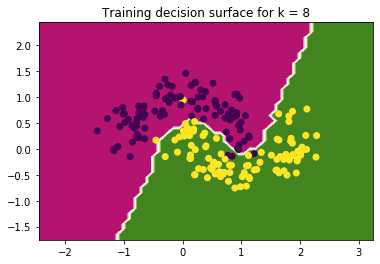

In [1023]:
#BEGIN Workspace 1.6
#TODO: Try different Ks        
kk = 8
model = KNNClassifier(k=kk)
model = model.fit(X_train, y_train)
plt.title("Training decision surface for k = {}".format(kk))
show_decision_surface(model)
#END Workspace 1.6

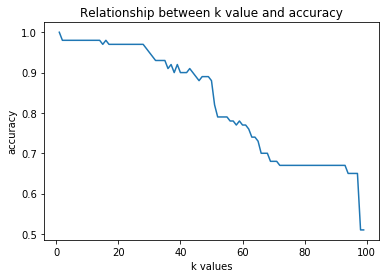

In [1024]:
# Code for 1.6

X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.19, random_state=42)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]

accList=[]
kList=[]
numTest = Numbers()
for i in range(1,100):
    kk = i
    model = KNNClassifier(k=kk)
    model = model.fit(X_train, y_train)
    accList.append(model.accuracy(X_train,y_train))
    kList.append(i)
plt.plot(kList,accList)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.title('Relationship between k value and accuracy')
plt.show()
# kk = i
# model = KNNClassifier(k=5)
# model = model.fit(X_train, )

#### Write up for 1.6 here

Base on the graph above, the relationship with k value and its accuracy is inverse. Which is, with the development of k, alghough in some places its accuracy increases, but the accuracy overall goes downward and eventually goes to binary case.

### Bonus (for the avid machine learner) (5 Points)
1.7. For which value of $k$ is the classifier consistent? (Only worry about this question within our `random_state=42` constraint)

1.8. Edit your `KNNClassifier` so that it's consistent for all $k$ (This solution should work beyond our `random_state=42` constraint, but retain the constraint when submitting your code above)

For a definition of a consistent classifier, refer to [Consistent Classification, Firm and Soft by Barum](https://proceedings.neurips.cc/paper/1996/file/7bb060764a818184ebb1cc0d43d382aa-Paper.pdf) (The answer is found in the abstract and introduction sections of the paper) 

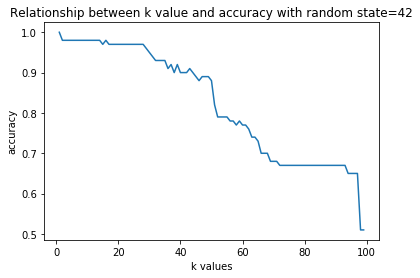

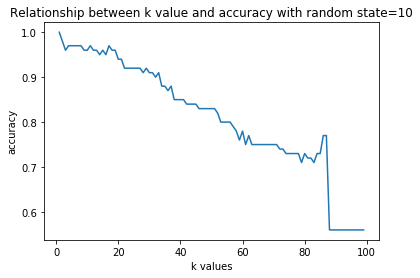

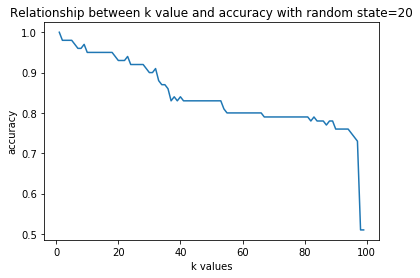

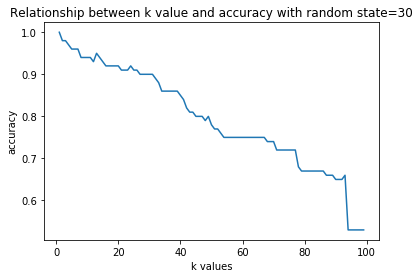

In [1026]:
X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.19, random_state=42)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]

accList=[]
kList=[]
numTest = Numbers()
for i in range(1,100):
    kk = i
    model = KNNClassifier(k=kk)
    model = model.fit(X_train, y_train)
    accList.append(model.accuracy(X_train,y_train))
    kList.append(i)
plt.plot(kList,accList)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.title('Relationship between k value and accuracy with random state=42')
plt.show()


X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.19, random_state=10)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]

accList=[]
kList=[]
numTest = Numbers()
for i in range(1,100):
    kk = i
    model = KNNClassifier(k=kk)
    model = model.fit(X_train, y_train)
    accList.append(model.accuracy(X_train,y_train))
    kList.append(i)
plt.plot(kList,accList)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.title('Relationship between k value and accuracy with random state=10')
plt.show()

X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.19, random_state=20)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]

accList=[]
kList=[]
numTest = Numbers()
for i in range(1,100):
    kk = i
    model = KNNClassifier(k=kk)
    model = model.fit(X_train, y_train)
    accList.append(model.accuracy(X_train,y_train))
    kList.append(i)
plt.plot(kList,accList)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.title('Relationship between k value and accuracy with random state=20')
plt.show()


X, y = sklearn.datasets.make_moons(n_samples=200, noise=0.19, random_state=30)
X_train, y_train = X[:100], y[:100]
X_test, y_test = X[100:], y[100:]

accList=[]
kList=[]
numTest = Numbers()
for i in range(1,100):
    kk = i
    model = KNNClassifier(k=kk)
    model = model.fit(X_train, y_train)
    accList.append(model.accuracy(X_train,y_train))
    kList.append(i)
plt.plot(kList,accList)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.title('Relationship between k value and accuracy with random state=30')
plt.show()

#### Write up for the bonus

1. Base on the graph above, no matter what random state it is, the relationship between k value and its accuracy is inverse which is the same with the result in 1.6. Therefore, with the increase of k value, the accracy overall decreases and eventually goes to binary(0.5). So, the k value and accuracy has inverse relationship. One reason is with the increase number of neighbors, there are more elements in the majority data, so the algorithm is easier to get confused

***
OK - now we've demonstrated that our KNN classifier works, let's think about our problem space! 

## Our Dataset - Identifying Digits from Images

It's a pretty common problem - just imagine working at the post office, and you're handed a hand-written check,
and you have to identify exactly what it says.
Did they pay 500 or 600 dollars? Is the letter going to 80309 (campus) or 30309 (Atlanta)?

Let's be a little smart about this - let's up some classes and helper functions to help us out.

### Problem 2: Implement KNN on Digits dataset - 25 Points

2.1 **Randomly** divide our digit dataset into training and testing sets (10 Points)

2.2 Report the number of examples in training and testing, as well as measuring then number of pixels in each image (5 points)

2.3 Create a confusion matrix of our classifier for K = 5 (10 points) *HINT: Doing this may cause you to catch mistakes in your classifier. Go fix those!*

In [1030]:

class Numbers:
    def __init__(self,k=5):
        #load data from sklearn
        
        data = sklearn.datasets.load_digits()
        features = data["data"]
        self.labels = data["target"]
        self.features = features.reshape(features.shape[0], -1)
        
        m,_=data["data"].shape
        randList = np.random.permutation(m)


        # BEGIN Workspace 2.1        
        self.train_x = np.array(data["data"][range(0,round(0.8*m))]) # A 2D np.array of training examples, REPLACE
        self.train_y = np.array(data["target"][range(0,round(0.8*m))]) # A 1D np.array of training answers, REPLACE
        self.test_x = np.array(data["data"][range(round(0.8*m),m)]) # A 2D np.array of testing examples, REPLACE
        self.test_y = np.array(data["target"][range(round(0.8*m),m)]) # A 1D np.array of testing answers, REPLACE
        
        self.k=k
        self.classifier = KNNClassifier(k) # KNNClassifier, REPLACE
        
        
        # TODO: - Divide our dataset into Train and Test datasets (80/20 split),
        #        replacing the variables above
        #       - Initialize the classifier
        #END Workspace 2.1
        
        
        
    def report(self):
        """
        Report information about the dataset using the print() function
        """
        #BEGIN Workspace 2.2
        #TODO: Create printouts for reporting the size of each set and the size of each datapoint
        
        #END Workspace 2.2
        print("------------Reporting the size of each set and data point-----------")
        print("The size for train_x=",len(self.train_x))
        print("The size for train_y=",len(self.train_y))
        print("The size for test_x=",len(self.test_x))
        print("The size for test_y=",len(self.test_y))
        print("--------------------------End Reporting----------------------------")
        
    def classify(self):
        """
        Fits classifier using the training data and generate a confusion matrix for the test data
        then return the confusion matrix
        """
        #BEGIN Workspace 2.3.a
        #TODO: Create classifier from training data, generate confusion matrix for test data
        # self.classifier.fit(# TODO)
        #END Workspace 2.3.a
        
        digitModel=self.classifier
        digitModel.fit(self.train_x, self.train_y)


        c_matrix=digitModel.confusion_matrix(self.test_x,self.test_y)
        return  c_matrix
        
    #Function for 3.1
    def misClassify(self):
        digitModel=KNNClassifier(5)
        digitModel.fit(self.train_x, self.train_y,)


        c_matrix=digitModel.confusion_matrix(self.test_x,self.test_y)
        
        misClassifyList=[]
        for i in range(len(self.test_y)):
            temp=digitModel.predict(self.test_x[[i]])
            if temp!=self.test_y[i]:
                print("i=",i)
                misClassifyList.append(self.test_y[i])
                print("Classification result",temp)
                self.view_digit(self.test_y[i])

        return  misClassifyList
        
    def accuracy(self):
        c_matrix = self.classify()
        accuracy = np.sum(c_matrix.diagonal())/c_matrix.sum()
        #BEGIN Workspace 2.3.b
        #TODO: Compute accuracy using confusion matrix
                
        #END Workspace 2.3.b
        
        return accuracy

    def view_digit(self, index):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        #TODO: process digit_image to matrix "image"
        digit_image = self.features[index]
        image = digit_image.reshape(8, -1)
        print("Image for digit {}".format(self.labels[index]))
        plt.matshow(image)
        plt.show()
        
        print("matrix image for digit",self.labels[index])
        print(image)
        

    @staticmethod
    def display_confusion(c_matrix):
        fig, ax = plt.subplots()
        ax.matshow(c_matrix, cmap=plt.cm.Blues)
        for i in range(c_matrix.shape[0]):
            for j in range(c_matrix.shape[0]):
                ax.text(i, j, str(c_matrix[j,i]), va='center', ha='center')
        plt.show()


------------Reporting the size of each set and data point-----------
The size for train_x= 1438
The size for train_y= 1438
The size for test_x= 359
The size for test_y= 359
--------------------------End Reporting----------------------------


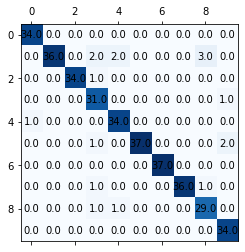

the accuracy is 0.9526462395543176


In [1031]:
numModel=Numbers(5)
numModel.report()
c_matrix=numModel.classify()
numModel.display_confusion(c_matrix)
print("the accuracy is",numModel.accuracy())

------------Reporting the size of each set and data point-----------
The size for train_x= 1438
The size for train_y= 1438
The size for test_x= 359
The size for test_y= 359
--------------------------End Reporting----------------------------
Image for digit 0


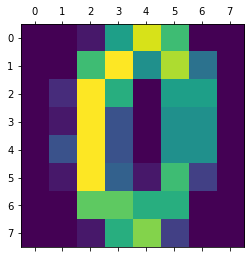

matrix image for digit 0
[[ 0.  0.  1.  9. 15. 11.  0.  0.]
 [ 0.  0. 11. 16.  8. 14.  6.  0.]
 [ 0.  2. 16. 10.  0.  9.  9.  0.]
 [ 0.  1. 16.  4.  0.  8.  8.  0.]
 [ 0.  4. 16.  4.  0.  8.  8.  0.]
 [ 0.  1. 16.  5.  1. 11.  3.  0.]
 [ 0.  0. 12. 12. 10. 10.  0.  0.]
 [ 0.  0.  1. 10. 13.  3.  0.  0.]]


In [1032]:
numbers = Numbers(5)
numbers.report()
numbers.view_digit(10)

*Wow, I can't believe we just created a KNN Classifier for multiple classes - but can't we make it better?*

Yes, we saw above that our classifier didn't work perfectly. Let's explore that issue a little further by turning the $K$ and random split knobs

### Problem 3: Improving KNN on Digits - 20 Points

3.1 Determine which classes are most often confused (from our confusion matrix above), inspect some examples of these digits (using the `view_digit` function in our Numbers class), and write a brief (4 - 5 sentences) description of why you think these particular numbers may be misclassified. (10 pts)

3.2 Explore the influence of the number of nearest neighbors (i.e. try changing our K). Plot the relationship between K and accuracy, and write a brief (4 - 5 sentences) description of how this factor impacts our accuracy. To mitigate the effect of randomness from the split, you have to run the evaluation multiple times and report the mean accuracy. Make sure the runs for different Ks are done on the same splits. (5 pts)

3.3 Explore the influence of the train / test split of our data (i.e. copy our Numbers class into Numbers2 below and try changing the split for our dataset). Plot the relationship between the split % and accuracy, and write a brief (4 - 5 sentences) description of its impact. (5 pts)

You can complete the `NumbersKnobs` class and use it as you see fit. But it's only necessary for 3.3

i= 30
Classification result [[1]]
Image for digit 8


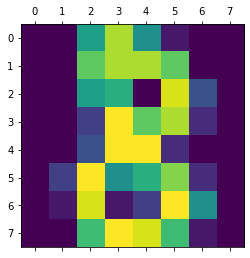

matrix image for digit 8
[[ 0.  0.  9. 14.  8.  1.  0.  0.]
 [ 0.  0. 12. 14. 14. 12.  0.  0.]
 [ 0.  0.  9. 10.  0. 15.  4.  0.]
 [ 0.  0.  3. 16. 12. 14.  2.  0.]
 [ 0.  0.  4. 16. 16.  2.  0.  0.]
 [ 0.  3. 16.  8. 10. 13.  2.  0.]
 [ 0.  1. 15.  1.  3. 16.  8.  0.]
 [ 0.  0. 11. 16. 15. 11.  1.  0.]]
i= 115
Classification result [[1]]
Image for digit 8


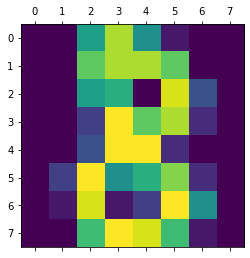

matrix image for digit 8
[[ 0.  0.  9. 14.  8.  1.  0.  0.]
 [ 0.  0. 12. 14. 14. 12.  0.  0.]
 [ 0.  0.  9. 10.  0. 15.  4.  0.]
 [ 0.  0.  3. 16. 12. 14.  2.  0.]
 [ 0.  0.  4. 16. 16.  2.  0.  0.]
 [ 0.  3. 16.  8. 10. 13.  2.  0.]
 [ 0.  1. 15.  1.  3. 16.  8.  0.]
 [ 0.  0. 11. 16. 15. 11.  1.  0.]]
i= 135
Classification result [[4]]
Image for digit 0


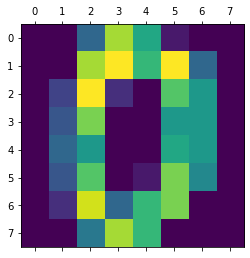

matrix image for digit 0
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
i= 144
Classification result [[5]]
Image for digit 9


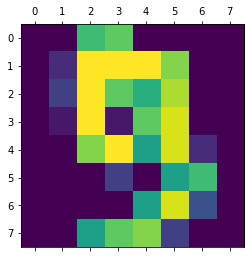

matrix image for digit 9
[[ 0.  0. 11. 12.  0.  0.  0.  0.]
 [ 0.  2. 16. 16. 16. 13.  0.  0.]
 [ 0.  3. 16. 12. 10. 14.  0.  0.]
 [ 0.  1. 16.  1. 12. 15.  0.  0.]
 [ 0.  0. 13. 16.  9. 15.  2.  0.]
 [ 0.  0.  0.  3.  0.  9. 11.  0.]
 [ 0.  0.  0.  0.  9. 15.  4.  0.]
 [ 0.  0.  9. 12. 13.  3.  0.  0.]]
i= 165
Classification result [[1]]
Image for digit 3


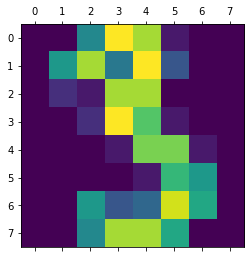

matrix image for digit 3
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]
i= 167
Classification result [[7]]
Image for digit 3


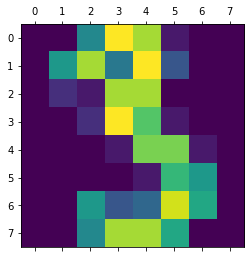

matrix image for digit 3
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]
i= 168
Classification result [[8]]
Image for digit 3


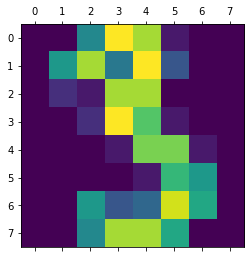

matrix image for digit 3
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]
i= 173
Classification result [[1]]
Image for digit 4


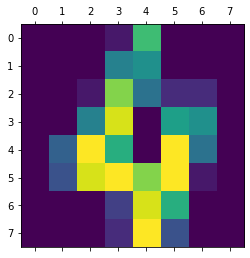

matrix image for digit 4
[[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]
i= 190
Classification result [[1]]
Image for digit 4


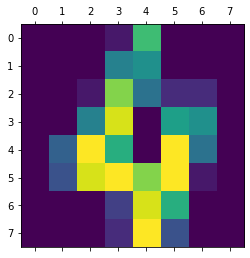

matrix image for digit 4
[[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]
i= 220
Classification result [[3]]
Image for digit 9


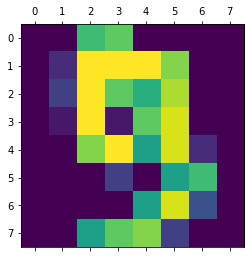

matrix image for digit 9
[[ 0.  0. 11. 12.  0.  0.  0.  0.]
 [ 0.  2. 16. 16. 16. 13.  0.  0.]
 [ 0.  3. 16. 12. 10. 14.  0.  0.]
 [ 0.  1. 16.  1. 12. 15.  0.  0.]
 [ 0.  0. 13. 16.  9. 15.  2.  0.]
 [ 0.  0.  0.  3.  0.  9. 11.  0.]
 [ 0.  0.  0.  0.  9. 15.  4.  0.]
 [ 0.  0.  9. 12. 13.  3.  0.  0.]]
i= 222
Classification result [[8]]
Image for digit 4


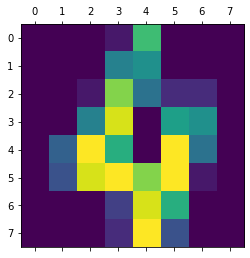

matrix image for digit 4
[[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]
i= 224
Classification result [[5]]
Image for digit 9


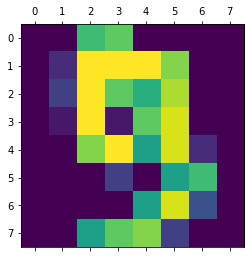

matrix image for digit 9
[[ 0.  0. 11. 12.  0.  0.  0.  0.]
 [ 0.  2. 16. 16. 16. 13.  0.  0.]
 [ 0.  3. 16. 12. 10. 14.  0.  0.]
 [ 0.  1. 16.  1. 12. 15.  0.  0.]
 [ 0.  0. 13. 16.  9. 15.  2.  0.]
 [ 0.  0.  0.  3.  0.  9. 11.  0.]
 [ 0.  0.  0.  0.  9. 15.  4.  0.]
 [ 0.  0.  9. 12. 13.  3.  0.  0.]]
i= 228
Classification result [[7]]
Image for digit 8


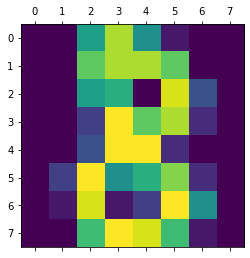

matrix image for digit 8
[[ 0.  0.  9. 14.  8.  1.  0.  0.]
 [ 0.  0. 12. 14. 14. 12.  0.  0.]
 [ 0.  0.  9. 10.  0. 15.  4.  0.]
 [ 0.  0.  3. 16. 12. 14.  2.  0.]
 [ 0.  0.  4. 16. 16.  2.  0.  0.]
 [ 0.  3. 16.  8. 10. 13.  2.  0.]
 [ 0.  1. 15.  1.  3. 16.  8.  0.]
 [ 0.  0. 11. 16. 15. 11.  1.  0.]]
i= 274
Classification result [[1]]
Image for digit 3


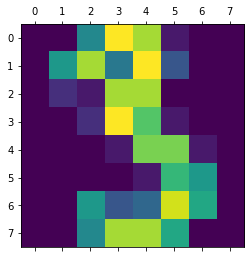

matrix image for digit 3
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]
i= 289
Classification result [[2]]
Image for digit 3


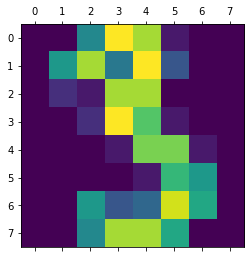

matrix image for digit 3
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]
i= 327
Classification result [[5]]
Image for digit 3


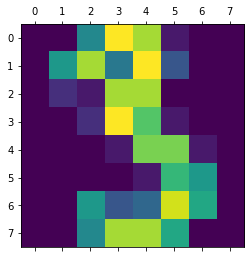

matrix image for digit 3
[[ 0.  0.  7. 15. 13.  1.  0.  0.]
 [ 0.  8. 13.  6. 15.  4.  0.  0.]
 [ 0.  2.  1. 13. 13.  0.  0.  0.]
 [ 0.  0.  2. 15. 11.  1.  0.  0.]
 [ 0.  0.  0.  1. 12. 12.  1.  0.]
 [ 0.  0.  0.  0.  1. 10.  8.  0.]
 [ 0.  0.  8.  4.  5. 14.  9.  0.]
 [ 0.  0.  7. 13. 13.  9.  0.  0.]]
i= 352
Classification result [[1]]
Image for digit 8


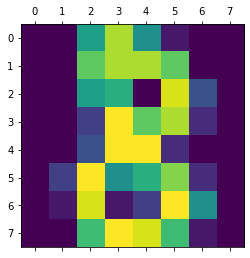

matrix image for digit 8
[[ 0.  0.  9. 14.  8.  1.  0.  0.]
 [ 0.  0. 12. 14. 14. 12.  0.  0.]
 [ 0.  0.  9. 10.  0. 15.  4.  0.]
 [ 0.  0.  3. 16. 12. 14.  2.  0.]
 [ 0.  0.  4. 16. 16.  2.  0.  0.]
 [ 0.  3. 16.  8. 10. 13.  2.  0.]
 [ 0.  1. 15.  1.  3. 16.  8.  0.]
 [ 0.  0. 11. 16. 15. 11.  1.  0.]]
missList= [8, 8, 0, 9, 3, 3, 3, 4, 4, 9, 4, 9, 8, 3, 3, 3, 8]


In [1046]:
#BEGIN 3.1a
#TODO: Print out problem class images
numTest = Numbers(5)
missList=numTest.misClassify()
print("missList=",missList)
#END 3.1a

#### 3.1b
TODO: Write description of mis-classification

Base on the classification above, the class often get confused are `3,4,8,9`,the reason those numbers get misclassified is because those images are very similar with other numbers' images. And because we are using KNN algorithm to classify those numbers, and knn algorithm is very sensitive to data's local structure, since it has large amount of neighbors and the algorithm treats all neighbors the same.it is likely those images was confused by its nearst neighbors.

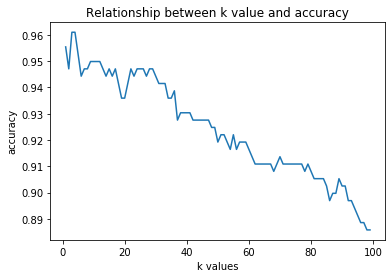

In [1047]:
#BEGIN 3.2a
#TODO: Run evaluation for different K and plot K vs Accuracy
accList=[]
kList=[]
for i in range(1,100):
    numTest = Numbers(i)
    kList.append(numTest.k)
    accList.append(numTest.accuracy())
plt.plot(kList,accList)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.title('Relationship between k value and accuracy')
plt.show()
#END 3.2a

#### 3.2b
TODO: Write of effect of K on classifier accuracy

Base on the graph above, with the development of k values, although there has been a small increase in some places, the overall accuracy rate shows a downward trend, so the relationship between k value and accuracy is inverse. The reason is because with small number of k, the algorithm could only find small amount of neighbors with same identities. However, by increasing k values,  the algorithm finds more nighbors with the same identities. This cause the algorithm miss classifies the images.

In [1048]:

class NumbersKnobs(Numbers):
    """ Inherits from Numbers, so feel free to use methods from Numbers
    """

    def __init__(self, k=5, train_ratio=0.8):
        #load data from sklearn
        self._k = k
        self.train_ratio = train_ratio
        
        data = sklearn.datasets.load_digits()
        features = data["data"]
        labels = data["target"]
        features = features.reshape(features.shape[0], -1)

        m,_=data["data"].shape
        randList = np.random.permutation(m)
        
                
        
        #BEGIN Workspace 3.3a
        self.train_x = np.array(data["data"][range(0,round(float(train_ratio*m)))]) # A 2D np.array of training examples, REPLACE
        self.train_y = np.array(data["target"][range(0,round(float(train_ratio*m)))]) # A 1D np.array of training answers, REPLACE
        self.test_x = np.array(data["data"][range(round(float(train_ratio*m)), m)]) # A 2D np.array of testing examples, REPLACE
        self.test_y = np.array(data["target"][range(round(float(train_ratio*m)), m)]) # A 1D np.array of testing answers, REPLACE
        
        self.classifier = KNNClassifier(k) # KNNClassifier, REPLACE
        
        
        # TODO: - Divide our dataset into Train and Test datasets (80/20 split),
        #        replacing the variables above
        #       - Initialize the classifier
        #TODO: Divide our dataset into Train and Test datasets (using trainPercentage), replacing the variables above
        #HINT: You should be able to mostly copy your own work from the original Numbers class
        #END Workspace 3.3a
        
    def report(self):
        """
        Report information about the dataset using the print() function
        """
        #BEGIN Workspace 2.2
        #TODO: Create printouts for reporting the size of each set and the size of each datapoint
        
        #END Workspace 2.2
        print("------------Reporting the size of each set and data point-----------")
        print("The size for train_x=",len(self.train_x))
        print("The size for train_y=",len(self.train_y))
        print("The size for test_x=",len(self.test_x))
        print("The size for test_y=",len(self.test_y))
        print("--------------------------End Reporting----------------------------")
        
    def classify(self):
        """
        Fits classifier using the training data and generate a confusion matrix for the test data
        then return the confusion matrix
        """
        #BEGIN Workspace 2.3.a
        #TODO: Create classifier from training data, generate confusion matrix for test data
        # self.classifier.fit(# TODO)
        #END Workspace 2.3.a
        
        digitModel=self.classifier
        digitModel.fit(self.train_x, self.train_y)


        c_matrix=digitModel.confusion_matrix(self.test_x,self.test_y)
        # Code for 3.1
        return  c_matrix
        
    #Function for 3.1
    def misClassify(self):
        digitModel=KNNClassifier(5)
        digitModel.fit(self.train_x, self.train_y,)


        c_matrix=digitModel.confusion_matrix(self.test_x,self.test_y)
        
        misClassifyList=[]
        for i in range(len(self.test_y)):
            temp=digitModel.predict(self.test_x[[i]])
            if temp!=self.test_y[i]:
                print("i=",i)
                misClassifyList.append(self.test_y[i])
                print("Classification result",temp)
                self.view_digit(self.test_y[i])


        return  misClassifyList
        
    def accuracy(self):
        c_matrix = self.classify()
        accuracy = np.sum(c_matrix.diagonal())/c_matrix.sum()
        #BEGIN Workspace 2.3.b
        #TODO: Compute accuracy using confusion matrix
                
        #END Workspace 2.3.b
        
        return accuracy

    def view_digit(self, index):
        """
        Display an image of a digit
        PARAMETERS
        digitImage - a data object from the dataset
        """
        #TODO: process digit_image to matrix "image"
        digit_image = self.features[index]
        image = digit_image.reshape(8, -1)
        print("Image for digit {}".format(self.labels[index]))
        plt.matshow(image)
        plt.show()
        
        print("matrix image for digit",self.labels[index])
        print(image)
        

    @staticmethod
    def display_confusion(c_matrix):
        fig, ax = plt.subplots()
        ax.matshow(c_matrix, cmap=plt.cm.Blues)
        for i in range(c_matrix.shape[0]):
            for j in range(c_matrix.shape[0]):
                ax.text(i, j, str(c_matrix[j,i]), va='center', ha='center')
        plt.show()


0.5: 0,1,2,3,4,
0.6: 0,1,2,3,4,
0.7: 0,1,2,3,4,


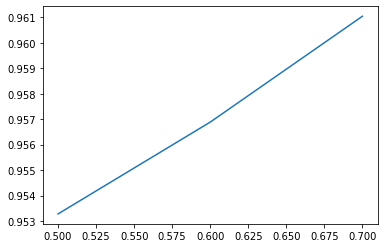

In [1049]:
#BEGIN Workspace 3.3b
#TODO: analyze the effect of split ratio
k = 5
repetitions = 5 # Feel free to increase it
split_ratios = np.array([0.5, 0.6, 0.7])
results = np.zeros((len(split_ratios),repetitions))


for i, s in enumerate(split_ratios):
    print(s ,end =": ")
    for j in range(repetitions):
        print(j, end=",")
        numbers = NumbersKnobs(k=k, train_ratio=s)
        results[i,j] = numbers.accuracy() # TODO get accuracy of classification
    print("")
# Add title axis labels to the plot

plt.plot(split_ratios, results.mean(1))

#END Workspace 3.3b

#### 3.3b
TODO: Write of effect of varying the split ratio, ultimately, you can run the classification several times for a fixed K and different split ratios

Base on the graph above, with the increase of split ratio, the accuracy is also increasing. Therefore, the relationship between split ratio and accuracy is positively correlated. This is because with small split train ratio, the model doesn't have great amount of data to learn. Thus, with the split ratio  increases, the training sample is also incrasing so the model will have enough data to learn. In addition to that, at certain point of split ratio, the accuracy will be staple, and increase split ratio will not increase its accuracy(would probably decrease its accuracy)

### Problem 4 : Improving KNN on MNIST using WeightedKNN (30 pts)
Complete the `WeightedKNNClassifier` class to perform the weighted KNN classification.
The Weighted KNN classifier assigns weights to the nearest-neighbor training examples proportional to the inverse-distance from the training example to the query point. Classification is performed by summing the weights associated with each class and predicting the class with the highest weighted-majority vote. Mathematically we might describe the weighted-vote for a class $c$ as 

$$
\textrm{Weighted-Vote}(c)(x) = \sum_{i \in {\cal N}_K(x)} I(y_i \in c) \times \frac{1}{\|{\bf x}_i - {\bf x}\|}
$$
where ${\cal N}_K(x)$ is the set of the closest $k$ neighbors to $x$


4.1 Complete the `fit` method in a similar way to `KNNClassifier` (5 pts)

4.2 Complete `majority_vote`: it's certainly possible that a query point could be distance $0$ away from some training example. If this happens your implementation should handle it and return the appropriate class label. (5 pts)

4.3 Complete `predict` (5 pts)

4.4 Compete `confusion_matrix` and `accuracy` methods (5 pts)

4.5 Compare `KNNClassifier` and `WeightedKNNClassifier` for multiple $K$, make sure that for each run both classifers are fitted using the same train/test split. You can execute multiple runs to mitigate the split randomness. Report for which K you get the best accuracy for each classifier and the best overall classifier. (10 pts)


In [1050]:
class WeightedKNNClassifier:
    """
    Class to store data for regression problems 
    """
    def __init__(self, k):
        """
        Creates a kNN instance
        :param k: The number of nearest points to consider in classification
        """
        
        # Import and build the BallTree on training features 
        self._k = k
        self._model = None
        self._y = None
        
        self._distanceFlag=True
        # Boolean flag indicating whether to do distance weighting (if you want to make it versatile)
        
    def fit(self, features, labels):
        
        # BEGIN Workspace 4.1
        self._model = sklearn.neighbors.BallTree(features)
        self._y = np.array(labels)

        #END Workspace 4.1

        # Should be used to map set of classes to {0,1,..C-1} where C is the number of classes
        classes = list(set(list(labels)))
        self.label_to_index = dict(zip(sorted(classes), range(len(classes))))
        self.index_to_label = dict(zip(range(len(classes)), sorted(classes)))
        
        self.distanceFlag=True
        return self



    def majority_vote(self, neighbor_indices, neighbor_distances=None):
        """
        Given indices of nearest neighbors in training set, return the majority label. 
        Break ties by considering 1 fewer neighbor until a clear winner is found. 

        :param neighbor_indices: The indices of the K nearest neighbors in self.X_train 
        :param neighbor_distances: Corresponding distances from query point to K nearest neighbors. 
        """
        
        
        # YOUR CODE HERE
        #BEGIN Workspace 4.2
#         labels = None #REPLACE
#         #END Workspace 4.2
        labels=[]
        myList=[]
        for i in neighbor_indices:
            myList.append(self._y[i])
        myDict={}
        for index, i in enumerate(neighbor_indices[0]):
            if neighbor_distances[0][index]==0:
                labels.append(self._y[i])
                break
            temp_weight=1/neighbor_distances[0][index]
            if self._y[i] not in myDict:
                myDict[self._y[i]]=temp_weight
            else:
                myDict[self._y[i]]+=temp_weight
        labels=max(myDict.items(), key=operator.itemgetter(1))[0]
        return labels




    
    def predict(self, features):
        """
        Given an np.array of query points, return y_hat, an np.array of predictions

        :param features: an (m x p) dimension np.array of points to predict labels for
        """
        labels =[]
        # YOUR CODE HERE
        #BEGIN Workspace 4.3
        #TODO: predict labels
        #END Workspace 4.3
        for i in features:
            distance,index=self._model.query(i.reshape(1, -1),k = self._k,return_distance=True)
#             print("distance",distance)
#             print("index",index)
            labels.append(self.majority_vote(index,distance))
        labels=np.array(labels)    
        return labels
    
    
    def confusion_matrix(self, features_test, labels_test):
        """
        Generate a confusion matrix for the given test set
        PARAMETERS
        testX - an np.array of feature vectors of test points
        testY - the corresponding correct classifications of our test set
        RETURN
        C - an N*N np.array of counts, where N is the number of classes in our classifier
        """
        c_matrix = np.zeros((len(Counter(self._y)),(len(Counter(self._y)))))
        #BEGIN Workspace 4.4.a
        #TODO: Run classification for the test set, compare to test answers, and add counts to matrix
            
        #END Workspace 4.4.a
        for i in range(len(features_test)):
            tempPred=self.predict(features_test[[i]])
            c_matrix[tempPred,labels_test[i]]+=1
        return c_matrix
    
    def accuracy(self, features_test, labels_test):
        """
        Generate an accuracy score for the classifier based on the confusion matrix
        PARAMETERS
        C - an np.array of counts
        RETURN
        score - an accuracy score
        """
        score = 0
        #BEGIN Workspace 4.4.b
        #TODO: Compute accuracy of the classification of features_test
        print("acc function")
        c_matrix = self.confusion_matrix(features_test, labels_test)
        score=np.sum(c_matrix.diagonal())/c_matrix.sum()
        #END Workspace 4.4.b
        return score 

In [1051]:
class NumbersWeighted(NumbersKnobs):
    def __init__(self, k=5, train_ratio=0.8):
        super(NumbersWeighted, self).__init__(k, train_ratio)
        self.classifier = WeightedKNNClassifier(k=self._k)
        

1: 0,1,2,3,4,5,6,7,8,9,
2: 0,1,2,3,4,5,6,7,8,9,
4: 0,1,2,3,4,5,6,7,8,9,
5: 0,1,2,3,4,5,6,7,8,9,
6: 0,1,2,3,4,5,6,7,8,9,
32: 0,1,2,3,4,5,6,7,8,9,
50: 0,1,2,3,4,5,6,7,8,9,


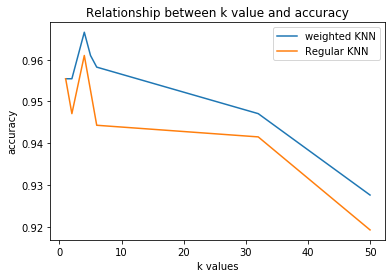

The best accuracy for weighted KNN is when k= 4
The best accuracy for unweighted KNN is when k= 4


In [1052]:
#BEGIN Workspace 4.5
#TODO: Run multiple comparisons
repetitions = 10
ks = [1, 2, 4, 5, 6, 32, 50] # Add more
results_simple = np.zeros((len(ks),repetitions))
results_weighted = np.zeros((len(ks),repetitions))

for i, k in enumerate(ks):
    print(k,end =": ")
    for j in range(repetitions):
        print(j, end=",")
        numbers = NumbersWeighted(k=k)
        results_weighted[i,j] = numbers.accuracy() # TODO get accuracy
        numbers.classifier = KNNClassifier(k=numbers._k)
        results_simple[i,j] = numbers.accuracy() #TODO get accuracy
    print("")

#TODO Average results over multiple runs and report best classifier
    
#END Workspace 4.5
#print(results_weighted)
#print(results_simple)

# print(results_weighted.mean())
# print(results_simple.mean())


weightMean=[]
simpleMean=[]
for i in results_weighted:
    weightMean.append(i.mean())
    
for i in results_simple:
    simpleMean.append(i.mean())
    

    
plt.plot(ks,weightMean,label="weighted KNN")
plt.plot(ks,simpleMean,label="Regular KNN")
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.title('Relationship between k value and accuracy')
plt.legend()
plt.show()


weighted_Max_K=ks[weightMean.index(max(weightMean))]
unWeighted_Max_K=ks[simpleMean.index(max(simpleMean))]

print("The best accuracy for weighted KNN is when k=",weighted_Max_K)
print("The best accuracy for unweighted KNN is when k=",unWeighted_Max_K)

# plt.plot(ks,results_weighted.mean(1),label="weighted KNN")
# plt.plot(ks,results_simple.mean(1),label="Regular KNN")
# plt.xlabel('k values')
# plt.ylabel('accuracy')
# plt.title('Relationship between k value and accuracy')
# plt.legend()
# plt.show()


#### 4.5
TODO: Report best results per classifier and overall performance. 

Based on the graph above, the weighted KNN classifier have better accuracy score compare to unweighted KNN classifier. Also, for both weighted KNN classifier and unweighted KNN classifier, the best accuracy score obtained when k=4. After it reaches the max accuracy, with the increase of k value, the accuracy starts to decrease. The reason weighted KNN classifier yields better result is because for unweighted KNN, it treats all neighbors the same, which makes the algorithm likely to confuse. And for weighted KNN classifier, it gives weight to each neighbors so the algorithm will less likely to get confused which will cause less miss classify.

#### Bonus (5 Points)
__4.6 Is `WeightedKNNClassifier` a consistent classifier? why or why not?__

*4.6 bonus response here*

Base on the graph above, the overall performance of weighted KNN classifier is better than unweighted KNN classifier. Since KNN is very sensitive to its local sturcture. Thus, when k value is large, KNN has a lot of samples. It is likely unweighted KNN will get confused (since it does the same treatment for all neighbors) and cause miss classification. By using weighted KNN, it gives weight to each neighbors, so that the algorithm knows which neighbor is more efficient, so it is less likely weighed KNN classifier get confused which cause less miss classification. Therefore, weighted KNN is a consistent classifier